<a href="https://colab.research.google.com/github/agustinarr/datos/blob/main/llamadas_trata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se trabajará con una base de datos obtenida en el Portal de Datos http://datos.jus.gob.ar/dataset/lucha-contra-la-trata-de-personas-llamados-linea-145-denuncias correspondiente a llamadas al 145 atendidas por personal técnico del Programa Nacional de Rescate y Acompañamiento a las Personas Damnificadas por el Delito de Trata

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [71]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv("/content/drive/MyDrive/analisis datos/datasets/oficina-rescate-denuncias-202001-202109.csv")

In [3]:
#conocer dimensiones y datos generales

dataset.shape

(2913, 29)

In [4]:
dataset.columns

Index(['fecha_ingreso', 'hora_ingreso', 'nro_registro_interno', 'situacion',
       'origen', 'es_anonima', 'tema', 'subtema', 'provincia', 'localidad',
       'dependencia_alta', 'via_ingreso', 'derivacion_institucion',
       'derivacion_fecha', 'derivacion_judicializa', 'derivacion2_institucion',
       'derivacion2_fecha', 'derivacion2_judicializa',
       'derivacion3_institucion', 'derivacion3_fecha',
       'derivacion3_judicializa', 'denunciante_nacionalidad',
       'denunciante_provincia', 'denunciante_localidad', 'denunciante_tipo',
       'denunciante_como_conocio_la_linea', 'denunciante_genero',
       'denunciante_edad_aparente', 'provincia_indec_id'],
      dtype='object')

In [5]:
dataset.head()

,fecha_ingreso,hora_ingreso,nro_registro_interno,situacion,origen,es_anonima,tema,subtema,provincia,localidad,dependencia_alta,via_ingreso,derivacion_institucion,derivacion_fecha,derivacion_judicializa,derivacion2_institucion,derivacion2_fecha,derivacion2_judicializa,derivacion3_institucion,derivacion3_fecha,derivacion3_judicializa,denunciante_nacionalidad,denunciante_provincia,denunciante_localidad,denunciante_tipo,denunciante_como_conocio_la_linea,denunciante_genero,denunciante_edad_aparente,provincia_indec_id
0,2020-01-01,20:32,584554505,Urgencia,Ciudadano,No,Trata,Explotación sexual,Buenos Aires,Maquinista Savio,PNR - Línea 145,Línea 145,Protex,2020-01-01 20:27,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denunciante - ciudadano,NaN,Hombre,NaN,6.0
1,2020-01-01,21:06,2584554505,Emergencia,Institución,No,Trata,"Explotación sexual niñas, niños y adolescentes",Buenos Aires,Ciudad Autónoma de Buenos Aires,PNR - Línea 145,Línea 145,Gendarmería Nacional Argentina,2020-01-01 20:52,Si,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,Buenos Aires,Ciudad Autónoma de Buenos Aires,Denunciante - ciudadano,NaN,Mujer,NaN,6.0
2,2020-01-02,01:45,3584554505,Urgencia,Ciudadano,No,Trata,"Extracción forzosa de órganos, tejidos o fluidos",Buenos Aires,San Francisco Solano,PNR - Línea 145,Línea 145,Protex,2020-01-02 01:38,Si,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,Buenos Aires,Claypole,Denunciante - ciudadano,NaN,Mujer,45.0,6.0
3,2020-01-02,16:52,594554505,Urgencia,Ciudadano,Si,Trata,Explotación sexual,Córdoba,Laboulaye,PNR - Línea 145,Línea 145,Protex,2020-06-24 15:13,Si,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,NaN,NaN,Denunciante - ciudadano,Por publicidad en internet,Mujer,50.0,14.0
4,2020-01-02,18:46,1594554505,Urgencia,Ciudadano,No,Trata,Posible captación,NaN,NaN,PNR - Línea 145,Correo Institucional,Protex,2020-06-24 15:14,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denunciante - ciudadano,NaN,Hombre,NaN,NaN


In [6]:
pip install funpymodeling


     |████████████████████████████████| 215 kB 13.4 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [7]:
from funpymodeling.exploratory import status, profiling_num, freq_tbl

import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
# Cantidad de llamadas, ¿hubo algun dia destacado?

dataset["fecha_ingreso"].value_counts()

2020-03-23    27
2020-01-09    12
2021-05-20    12
2020-08-04    12
2020-08-26    11
              ..
2020-11-23     1
2021-06-13     1
2021-02-21     1
2021-05-15     1
2021-02-14     1
Name: fecha_ingreso, Length: 617, dtype: int64

In [9]:
# Provincias 

dataset["provincia"].value_counts()

Buenos Aires                       1361
Córdoba                             176
Santa Fe                            156
Mendoza                             136
Ciudad Autónoma de Buenos Aires      96
Tucumán                              75
Salta                                74
Misiones                             68
Neuquén                              65
Corrientes                           62
Río Negro                            57
Entre Ríos                           42
Santiago del Estero                  38
Chubut                               36
Chaco                                35
Jujuy                                31
San Luis                             26
Catamarca                            23
Santa Cruz                           20
Formosa                              16
San Juan                             16
La Pampa                             10
La Rioja                              9
Tierra del Fuego                      8
Colorado                              1


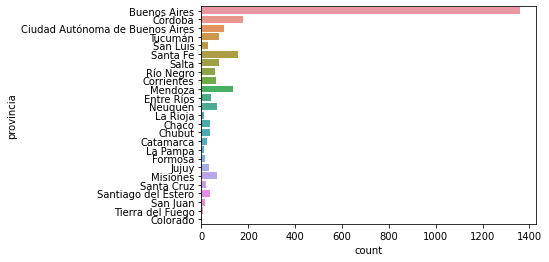

In [78]:
sns.countplot(y="provincia", data=dataset)

In [10]:
#Bien, el dia 23 de marzo de 2020 hubo una mayor cantidad de llamados en relación a los demás días.. ¿hubo predominancia de alguna provincia?

dia_mas = dataset[dataset.fecha_ingreso=="2020-03-23"]

dia_mas.provincia.value_counts()

Buenos Aires    26
Mendoza          1
Name: provincia, dtype: int64

In [11]:
# Cual fue el principal motivo (subtema) de llamada realizadas ese dia?

dia_mas.subtema.value_counts()

Covid-19                              24
Privacion ilegitima de la libertad     1
Explotación sexual                     1
Privacion ilegitima                    1
Name: subtema, dtype: int64

In [12]:
#Bueno, subtema covid tuvo  frecuencia en otros dias?

subtema_mas = dataset[dataset.subtema=="Covid-19"]

subtema_mas.fecha_ingreso.value_counts()


2020-03-23    24
2020-03-24     5
2020-04-20     1
2020-03-30     1
Name: fecha_ingreso, dtype: int64

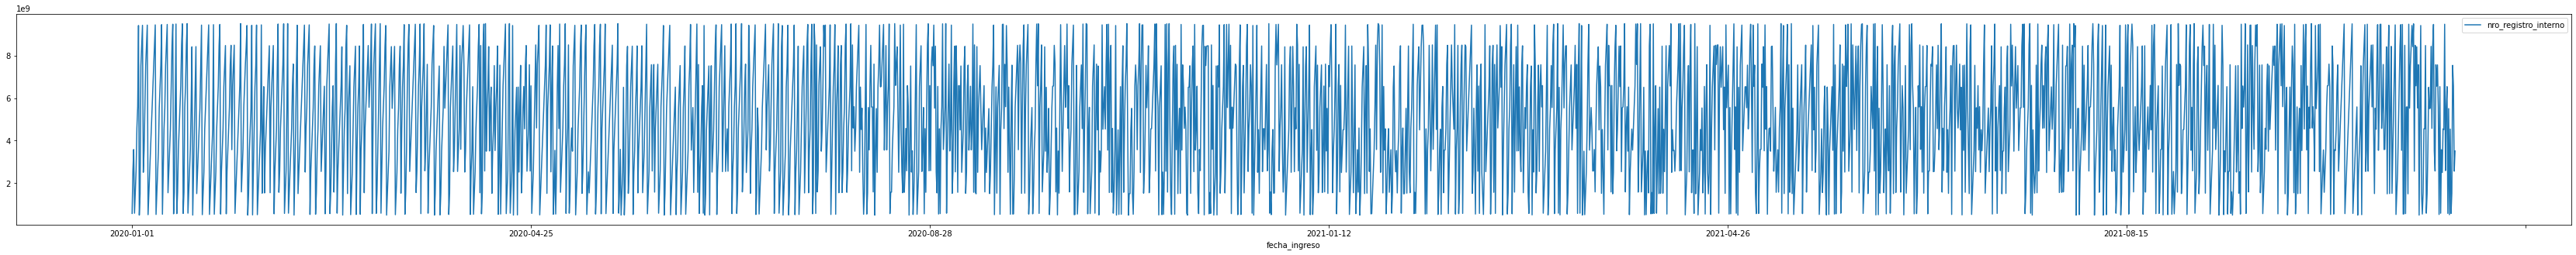

In [130]:

dataset.plot(x = "fecha_ingreso", y = "nro_registro_interno", figsize= (59,5))


In [85]:
# Subtemas con mas llamados

dataset.subtema.value_counts()

Explotación sexual                                                                                                    1087
Explotación laboral                                                                                                    426
Posible captación                                                                                                      256
Explotación sexual niñas, niños y adolescentes                                                                         211
Persona desaparecida                                                                                                   204
                                                                                                                      ... 
Maltrato infantil                                                                                                        1
Estafa y amenazas.                                                                                                       1
Explotación labo

In [94]:
fecha_explotacion = dataset[dataset.subtema== "Explotación sexual"].fecha_ingreso.value_counts()
fecha_explotacion

2021-04-26    9
2021-08-25    9
2021-07-29    7
2020-08-26    7
2020-01-20    7
             ..
2021-07-09    1
2021-05-15    1
2021-04-08    1
2021-02-17    1
2020-05-31    1
Name: fecha_ingreso, Length: 496, dtype: int64

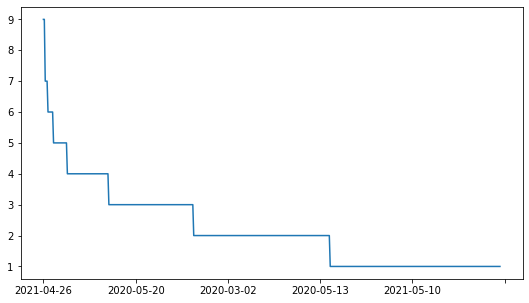

In [131]:
#hubo algunos aumentos pero se mantiene constante 

fecha_explotacion.plot(figsize= (9,5))


In [132]:
dataset.hora_ingreso.value_counts()

15:47    10
16:03    10
13:06    10
11:31     9
15:16     9
         ..
03:07     1
08:01     1
22:15     1
01:41     1
09:27     1
Name: hora_ingreso, Length: 1044, dtype: int64

In [136]:
dataset.localidad.value_counts()

Buenos Aires                       257
Ciudad Autónoma de Buenos Aires    172
Córdoba                            103
Rosario                             85
La Plata                            69
                                  ... 
San Antonio de Padua                 1
William C. Morris                    1
san cristobal                        1
Funes                                1
Embarcación                          1
Name: localidad, Length: 547, dtype: int64

In [135]:
dataset[dataset.subtema== "Explotación sexual"].provincia.value_counts()

Buenos Aires                       558
Córdoba                             65
Santa Fe                            58
Ciudad Autónoma de Buenos Aires     55
Mendoza                             48
Tucumán                             28
Neuquén                             26
Salta                               22
Misiones                            21
Entre Ríos                          18
Chubut                              17
Corrientes                          12
Río Negro                           11
San Luis                            10
Jujuy                                9
Santa Cruz                           8
Chaco                                6
Catamarca                            6
Formosa                              4
San Juan                             4
La Pampa                             3
La Rioja                             3
Santiago del Estero                  2
Tierra del Fuego                     2
Name: provincia, dtype: int64

Luego de obtener datos generales, a partir de este breve analisis es posible afirmar que:
*hubo un dia destacado por su cantidad de llamadas recibidas, el 23/03/2020, cuyo subtema principal fue Covid 19. 
*el subtema mas concurrido es el de explotación sexual, que si bien tiene un par de dias con mas llamados de lo habitual, su cantidad se mantiene constante. 